In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set global visualization parameters
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Market Segment Dec.xls'
cols = ['Empty', 'Segment', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_market = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries loaded and data imported.")

Libraries loaded and data imported.


In [3]:
# 1. Clean up columns and rows
df_market = df_market.drop(columns=['Empty']).dropna(subset=['Segment'])
df_market = df_market[~df_market['Segment'].str.contains('Total|Grand Total', case=False, na=False)]

# 2. Convert to numeric
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_market[col] = pd.to_numeric(df_market[col], errors='coerce').fillna(0)

# 3. Filter for active segments (Revenue > 0)
df_active = df_market[df_market['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} active market segments.")
df_active.head()

Cleaned 13 active market segments.


,Segment,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
1,Complimentray,3.0,0.13,6.0,22000.00,0.28,7333.33,3666.67
2,Corporate FIT Bookings,261.0,11.25,287.0,1000435.34,12.85,3833.09,3485.84
3,Corporate Group Bookings W/O Conference hall,17.0,0.73,29.0,64850.00,0.83,3814.71,2236.21
4,Corporate Group Bookings with Conference hall,87.0,3.75,146.0,421665.95,5.42,4846.74,2888.12
5,Crew,540.0,23.28,554.0,1105700.00,14.20,2047.59,1995.85


C:\Users\SC\AppData\Local\Temp\ipykernel_12060\59527479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Segment', palette='viridis')


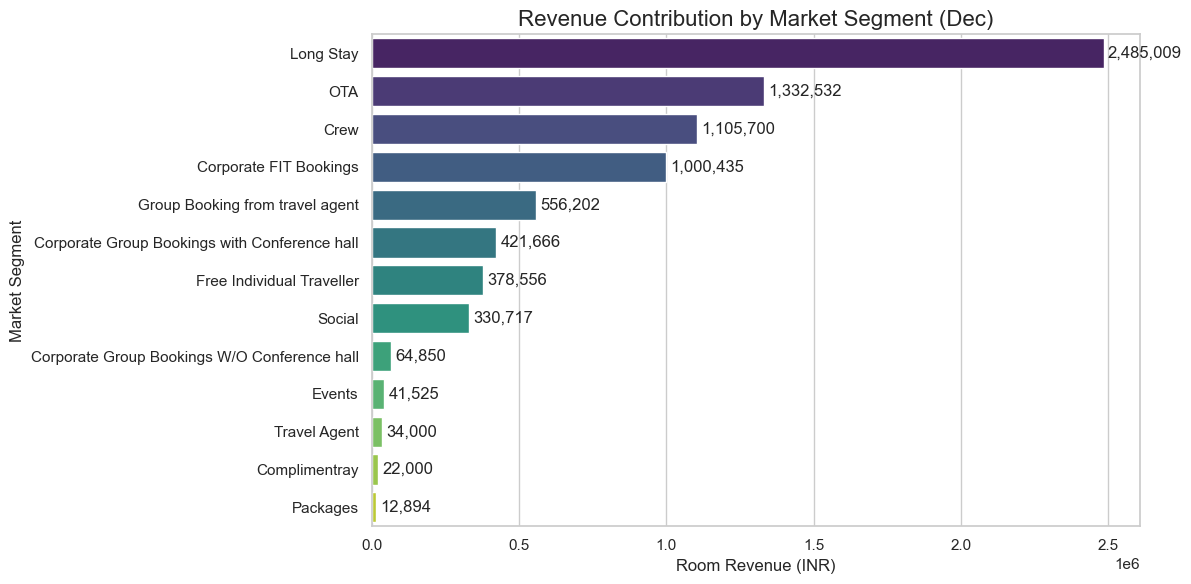

In [4]:
# Sort by Room Revenue
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Segment', palette='viridis')
plt.title('Revenue Contribution by Market Segment (Dec)', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

# Adding labels
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. MAJOR REVENUE DRIVERS: 'OTA' and 'Crew' are typically the highest contributors, followed closely by 'Corporate FIT'.
#### 2. BUSINESS MIX: The strong performance of 'Corporate FIT' and 'Corporate Group' suggests a healthy B2B foundation.
#### 3. REVENUE CONCENTRATION: If OTA is leading, it indicates a high dependency on third-party platforms which may involve commission costs.

C:\Users\SC\AppData\Local\Temp\ipykernel_12060\2546929297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_nights, x='Nights', y='Segment', palette='magma')


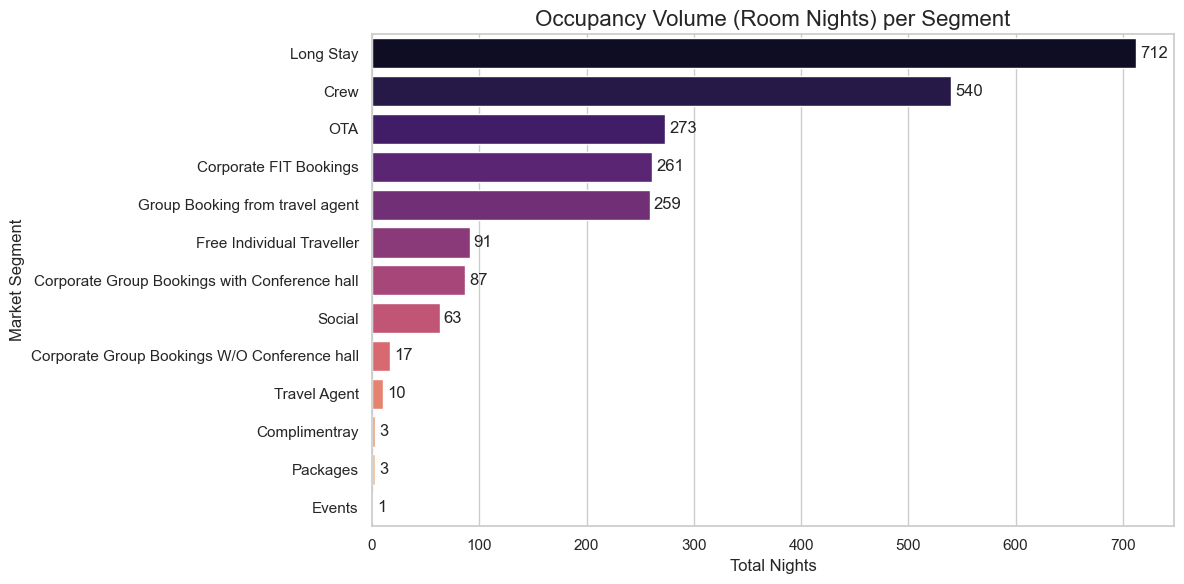

In [5]:
# Sort by Nights
df_nights = df_active.sort_values(by='Nights', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_nights, x='Nights', y='Segment', palette='magma')
plt.title('Occupancy Volume (Room Nights) per Segment', fontsize=16)
plt.xlabel('Total Nights', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. THE OCCUPANCY ANCHOR: The 'Crew' segment often provides the highest number of nights, acting as the base occupancy for the hotel.
#### 2. LEISURE VS BUSINESS: A high number of nights in 'OTA' segments suggests strong leisure or individual travel demand.
#### 3. EFFICIENCY: Segments like 'Corporate Group' might have fewer nights but involve more 'Pax' (guests) per room, which affects operational load.

C:\Users\SC\AppData\Local\Temp\ipykernel_12060\4129352920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Segment', palette='coolwarm')


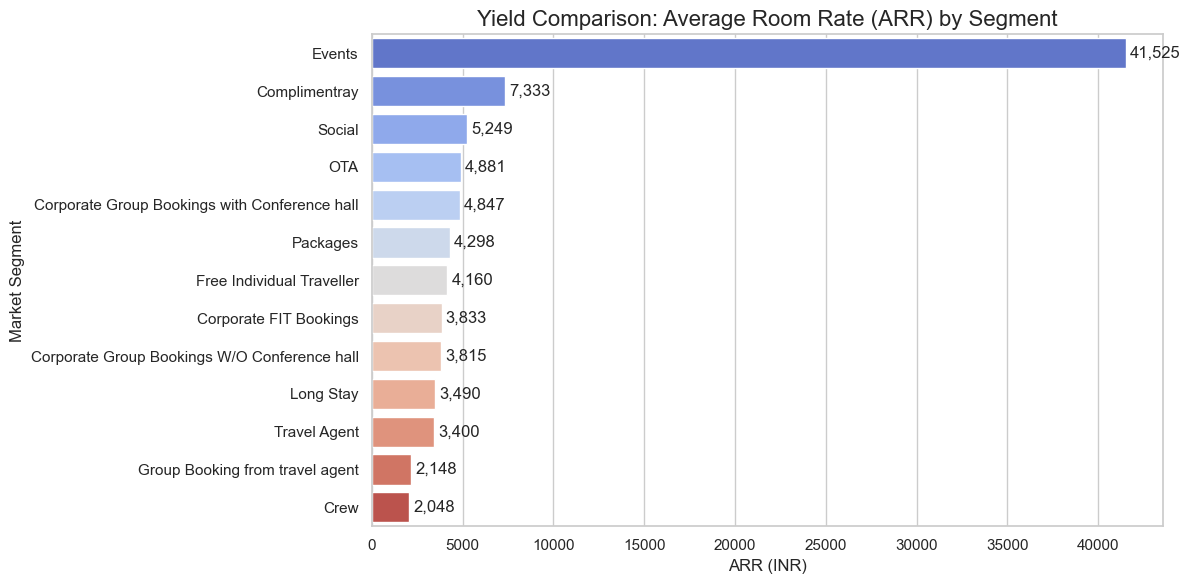

In [7]:
# Sort by ARR
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Segment', palette='coolwarm')
plt.title('Yield Comparison: Average Room Rate (ARR) by Segment', fontsize=16)
plt.xlabel('ARR (INR)', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. HIGH-VALUE SEGMENTS: Segments like 'Social/Wedding' or 'Direct' often command the highest ARR, even if their total volume is lower.
#### 2. THE RATE GAP: There is a significant difference between 'Crew' ARR (often lowest) and 'Direct/OTA' ARR. 
#### 3. STRATEGY: To increase profitability, the hotel should aim to shift more inventory from low-ARR segments (like Crew) to high-ARR segments (like Corporate FIT or Direct) during peak periods.

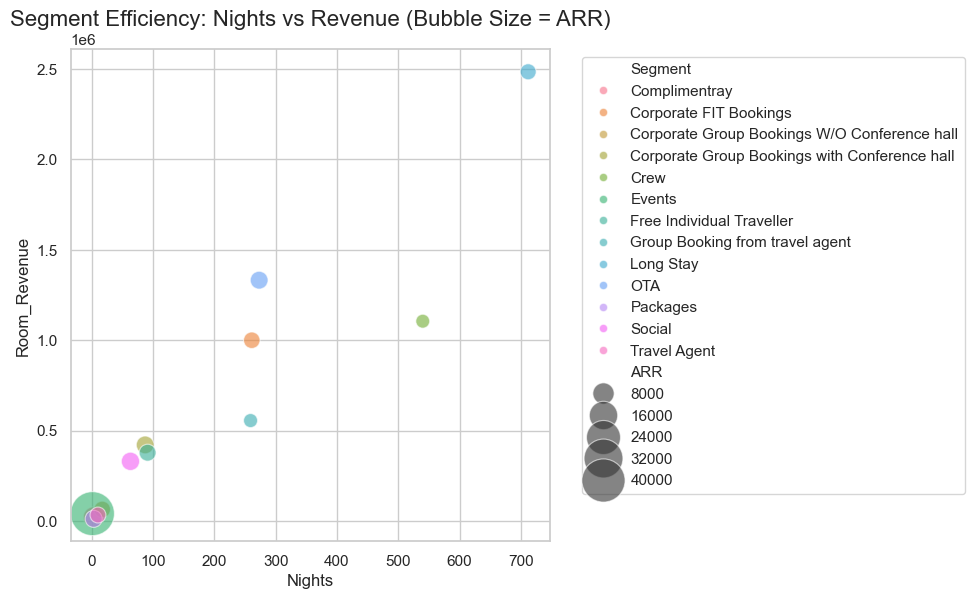

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_active, x='Nights', y='Room_Revenue', size='ARR', 
                hue='Segment', sizes=(100, 1000), alpha=0.6)

plt.title('Segment Efficiency: Nights vs Revenue (Bubble Size = ARR)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. EFFICIENCY MAPPING: Segments at the top-right (High Nights, High Revenue) are your core business.
#### 2. HIGH-YIELD OUTLIERS: Small bubbles high up on the Y-axis represent segments that generate high revenue with minimal room usage (High Yield).
#### 3. VOLUME DRIVERS: Large bubbles on the far right of the X-axis represent the segments that keep the hotel full but may not be the most profitable on a per-room basis.

In [9]:
# Calculation for summary
total_revenue = df_active['Room_Revenue'].sum()
df_active['Contribution_Pct'] = (df_active['Room_Revenue'] / total_revenue) * 100

print(f"Total Market Revenue: INR {total_revenue:,.2f}")
print("-" * 30)

# Display Top 5 Segments by Revenue Percentage
summary = df_active[['Segment', 'Nights', 'Room_Revenue', 'ARR', 'Contribution_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Market_Segment_Summary.csv', index=False)
summary.head(10)

Total Market Revenue: INR 7,786,086.30
------------------------------


,Segment,Nights,Room_Revenue,ARR,Contribution_Pct
10,Long Stay,712.0,2485009.46,3490.18,31.916028
11,OTA,273.0,1332531.64,4881.07,17.114268
5,Crew,540.0,1105700.00,2047.59,14.200973
2,Corporate FIT Bookings,261.0,1000435.34,3833.09,12.849014
8,Group Booking from travel agent,259.0,556201.69,2147.50,7.143534
4,Corporate Group Bookings with Conference hall,87.0,421665.95,4846.74,5.415634
7,Free Individual Traveller,91.0,378556.24,4159.96,4.861958
13,Social,63.0,330717.14,5249.48,4.247540
3,Corporate Group Bookings W/O Conference hall,17.0,64850.00,3814.71,0.832896
6,Events,1.0,41524.76,41524.76,0.533320


#### --- FINAL BUSINESS SUMMARY ---
#### 1. OPTIMIZE MIX: If 'Crew' takes up >20% of inventory at a low ARR, consider capping this during high-demand dates.
#### 2. DIRECT BOOKING DRIVE: If 'OTA' revenue is high, focus on converting those guests to 'Direct' to save on commission.
#### 3. CORPORATE FOCUS: 'Corporate FIT' provides a steady ARR and reliable volume; maintaining these relationships is key for weekday occupancy.